In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import alpaca_backtrader_api
import backtrader as bt
from datetime import datetime

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
ALPACA_API_KEY = 'PKDTE5620V0WYXASPY7B'
ALPACA_SECRET_KEY = 'KWMA0L27G5EJabeELgHjvQapou9GYg8e0xPKdfpe'
ALPACA_PAPER = False

In [3]:

class SmaCross(bt.SignalStrategy):
    
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)
    
    def logdata(self):
        txt = []
        txt.append('{}'.format(len(self)))
           
        txt.append('{}'.format(
            self.data.datetime.datetime(0).isoformat())
        )
        txt.append('{:.2f}'.format(self.data.open[0]))
        txt.append('{:.2f}'.format(self.data.high[0]))
        txt.append('{:.2f}'.format(self.data.low[0]))
        txt.append('{:.2f}'.format(self.data.close[0]))
        txt.append('{:.2f}'.format(self.data.volume[0]))
        print(','.join(txt))
        
    def notify_order(self, order):
        if order.status == order.Completed:
            buysell = 'BUY ' if order.isbuy() else 'SELL'
            txt = '{} {} {:.2f}@{}'.format(self.data.datetime.datetime(0).isoformat(), 
                                           buysell, order.executed.size, order.executed.price)
            print(txt)
            
    def next(self):
        pass
#         self.notify_order()

Starting Portfolio Value: 10000.00
2022-05-17T14:00:00 BUY  13.53@147.79
2022-05-19T11:00:00 SELL -13.53@139.75
2022-05-24T15:00:00 BUY  14.32@138.17
2022-05-25T16:00:00 SELL -14.32@139.92
2022-05-26T14:00:00 BUY  14.10@140.63
2022-06-03T14:00:00 SELL -14.10@147.15
2022-06-08T15:00:00 BUY  13.43@149.01
2022-06-10T12:00:00 SELL -13.43@143.0
2022-06-21T15:00:00 BUY  14.51@136.81
2022-06-29T14:00:00 SELL -14.51@139.51
2022-07-05T16:00:00 BUY  14.31@139.35
2022-07-14T12:00:00 SELL -14.31@144.05
2022-07-15T12:00:00 BUY  13.51@148.64
2022-07-26T13:00:00 SELL -13.51@151.96
2022-07-28T12:00:00 BUY  12.92@156.12
2022-08-09T16:00:00 SELL -12.92@165.11
2022-08-10T15:00:00 BUY  12.15@167.75
Final Portfolio Value: 10212.92


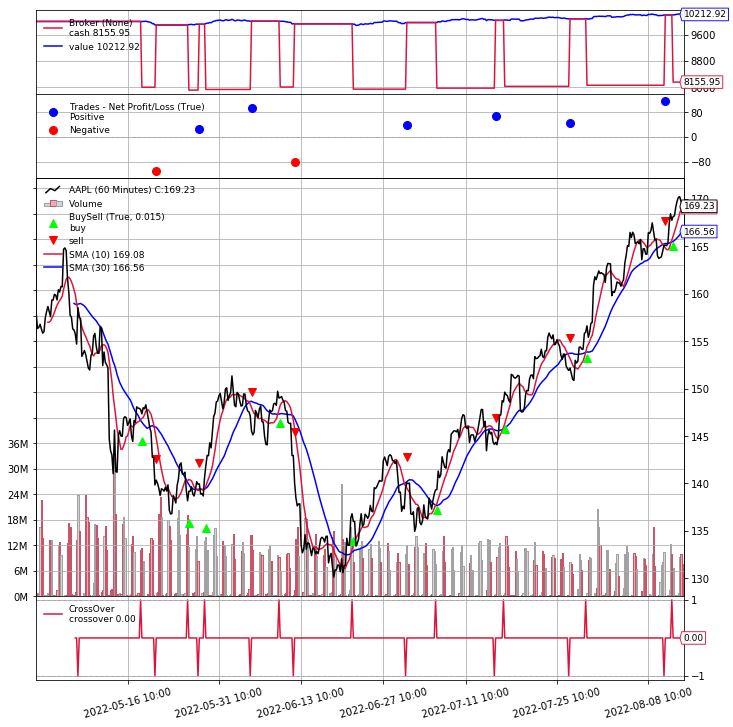

[[<Figure size 720x720 with 5 Axes>]]

In [4]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

cerebro.addsizer(bt.sizers.PercentSizer, percents=20)
store = alpaca_backtrader_api.AlpacaStore(
    key_id=ALPACA_API_KEY,
    secret_key=ALPACA_SECRET_KEY,
    paper=True,
    
)

if ALPACA_PAPER:
  broker = store.getbroker()  # or just alpaca_backtrader_api.AlpacaBroker()
  cerebro.setbroker(broker)

DataFactory = store.getdata  # or use alpaca_backtrader_api.AlpacaData
data0 = DataFactory(dataname='AAPL', historical=True, fromdate=datetime(
    2022, 5, 1), todate=datetime(2022, 8, 12), timeframe=bt.TimeFrame.TFrame("Minutes"), compression = 60)

cerebro.adddata(data0)

# cerebro.resampledata(data0,timeframe=bt.TimeFrame.Minutes,compression=120)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()